# Comparing several means (one-way ANOVA)

We have several groups of observations. Do these groups differ in terms of some outcome variable of interest?

## An illustrative data set

18 participants in a clinical trail for depression treatment. <br> 
therapy: 9 in CBT, 9 none<br>
drugs: 6 joyzepam, 6 anxifree, 6 placebo<br> 

assess the mood of each person after a 3 month run with each drug. Overall improvement in mood is assessed on a scale ranging from -5 to +5

In [2]:
library(lsr)
load("clinicaltrial.Rdata")
who(TRUE)

   -- Name --    -- Class --   -- Size --
   clin.trial    data.frame    18 x 3    
    $drug        factor        18        
    $therapy     factor        18        
    $mood.gain   numeric       18        

In [3]:
print(clin.trial)

       drug    therapy mood.gain
1   placebo no.therapy       0.5
2   placebo no.therapy       0.3
3   placebo no.therapy       0.1
4  anxifree no.therapy       0.6
5  anxifree no.therapy       0.4
6  anxifree no.therapy       0.2
7  joyzepam no.therapy       1.4
8  joyzepam no.therapy       1.7
9  joyzepam no.therapy       1.3
10  placebo        CBT       0.6
11  placebo        CBT       0.9
12  placebo        CBT       0.3
13 anxifree        CBT       1.1
14 anxifree        CBT       0.8
15 anxifree        CBT       1.2
16 joyzepam        CBT       1.8
17 joyzepam        CBT       1.3
18 joyzepam        CBT       1.4


we are really interested in the effect of drug on mood.gain

In [4]:
xtabs(~drug, clin.trial)

drug
 placebo anxifree joyzepam 
       6        6        6 

In [5]:
aggregate(mood.gain ~ drug, clin.trial, mean)

drug,mood.gain
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [6]:
aggregate(mood.gain~drug, clin.trial, sd)

drug,mood.gain
placebo,0.2810694
anxifree,0.3920034
joyzepam,0.2136976



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




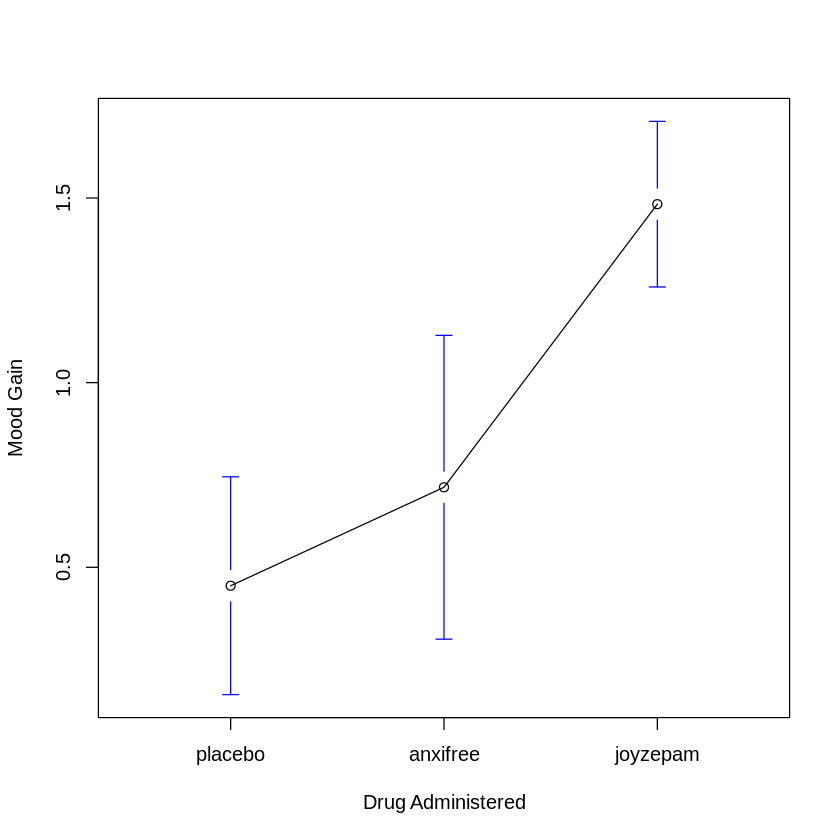

In [7]:
library(gplots)
plotmeans(formula=mood.gain~drug, # plot mood gain by drug
          data=clin.trial,        # data frame
          xlab = "Drug Administered", 
          ylab = "Mood Gain",
          n.label=FALSE)

Is the difference between the drugs "real" or are they due to chance?

## How ANOVA works

compare the average mood change for 3 different drugs. similar to t-test but more groups. 

$$
H_0 : \text{it is true that } \mu_p = \mu_A = \mu_J
$$

$$
H_1 : \text{it is NOT true that } \mu_p = \mu_A = \mu_J
$$

**Two formulas for the variance of Y**

- $G$ = total number of groups ($G=3$)
- $N$ = total sample size ($N=18$)
- $N_k$ = number of people in the k-th group ($N_k$ = 6 for all 3 groups (this means the dataset is balanced))
- $Y$ = outcome variable

sample variance:

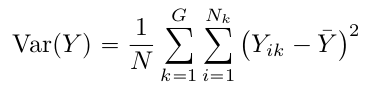

**From variances to sum of squares**

instead of variance, go for total sum of squares ($SS_{tot}$)

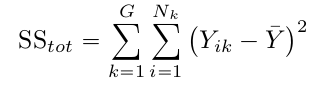

2 different sums of squares: 

**within group sum of squares**
How is each individual different from their own group mean?
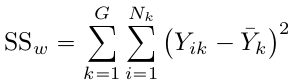

**between-group sum of squares**
How is look at differences beetween group means and grand mean
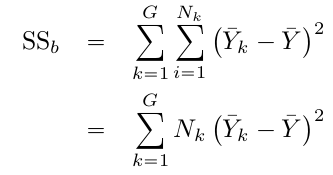


relationship between total sum of squares and within group, between-group, and within-group<br>
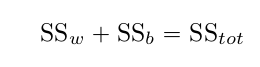


total variability = variation due to differences in sample means for different groups + rest of variation. If null=True, the all sample means should be close to each other, so SSb < SSw

**From sums of squares to the F-test**

first get degrees of freedom associated with SSb and SSw. 

$$
\text{df}_b = G - 1
$$
$$
\text{df}_w = N - G
$$

covert summed squares into mean squares

$$
\text{MS}_b = \frac{\text{SS}_b}{\text{df}_b}
$$
$$
\text{MS}_w = \frac{\text{SS}_w}{\text{df}_w}
$$

now calculate the F-ratio

$$
F = \frac{\text{MS}_b}{\text{MS}_w}
$$

How large does F have to be to reject the null?<br> 

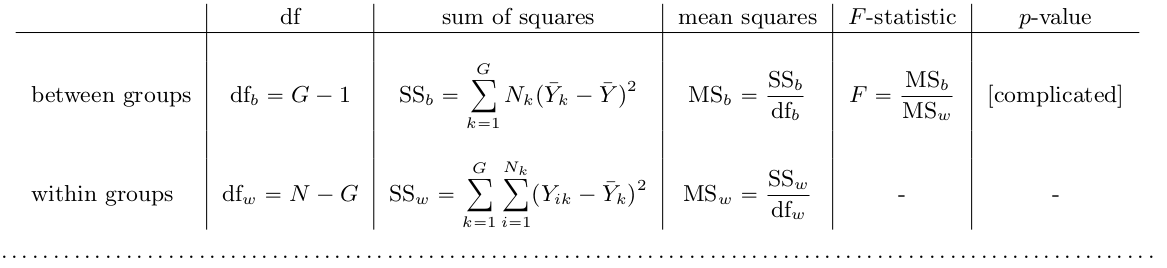

**The model for the data and the meaning of F**

Null hypothesis:<br> 
$$
Y_{ik} = \mu + \epsilon_{ik}
$$

observation = mean + error (i.e. residual- stuff the model can't explain)

We make the assumption that residuals are normally distributed ($\epsilon_{ik} \sim \text{Normal}(0, \sigma^2)$

alternative hypothesis:
$$
Y_{ik} = \mu_k + \epsilon_{ik}
$$

the within-groups mean square ($\text{MS}_w$) can be an estimator for the variance $\sigma^2$<br> 
The between-groups mean square ($\text{MS}_b$) estimates the error variance PLUS something that depends on the true difference among group means (call it $Q$), so:
$$
F = \frac{\hat Q + \hat \sigma^2}{\hat \sigma^2}
$$

where $Q=0$ if the null hypothesis is true and and $Q>0$ if the alternative hypothesis is True. <br> 

So F must be larger than 1 if we can safely reject the null. 

**A worked example**

In [18]:
outcome <- clin.trial$mood.gain
group <- clin.trial$drug
gp.means <- tapply(outcome, group, mean)
gp.means <- gp.means[group]
dev.from.gp.means <- outcome - gp.means
squared.devs <- dev.from.gp.means ^2
Y <- data.frame(group, outcome, gp.means, dev.from.gp.means, squared.devs)
print(Y, digits=2)

      group outcome gp.means dev.from.gp.means squared.devs
1   placebo     0.5     0.45             0.050       0.0025
2   placebo     0.3     0.45            -0.150       0.0225
3   placebo     0.1     0.45            -0.350       0.1225
4  anxifree     0.6     0.72            -0.117       0.0136
5  anxifree     0.4     0.72            -0.317       0.1003
6  anxifree     0.2     0.72            -0.517       0.2669
7  joyzepam     1.4     1.48            -0.083       0.0069
8  joyzepam     1.7     1.48             0.217       0.0469
9  joyzepam     1.3     1.48            -0.183       0.0336
10  placebo     0.6     0.45             0.150       0.0225
11  placebo     0.9     0.45             0.450       0.2025
12  placebo     0.3     0.45            -0.150       0.0225
13 anxifree     1.1     0.72             0.383       0.1469
14 anxifree     0.8     0.72             0.083       0.0069
15 anxifree     1.2     0.72             0.483       0.2336
16 joyzepam     1.8     1.48            

In [19]:
SSw <- sum(squared.devs)
print(SSw)

[1] 1.391667


In [21]:
gp.means <- tapply(outcome, group, mean)
grand.mean <- mean(outcome)
dev.from.grand.mean <- gp.means - grand.mean
squared.devs <- dev.from.grand.mean^2
gp.sizes <- tapply(outcome, group, length)
wt.squared.devs <- gp.sizes * squared.devs
Y2 <- data.frame(gp.means, grand.mean, dev.from.grand.mean, squared.devs, gp.sizes, wt.squared.devs)
print(Y2, digits=2)

         gp.means grand.mean dev.from.grand.mean squared.devs gp.sizes
placebo      0.45       0.88               -0.43        0.188        6
anxifree     0.72       0.88               -0.17        0.028        6
joyzepam     1.48       0.88                0.60        0.360        6
         wt.squared.devs
placebo             1.13
anxifree            0.17
joyzepam            2.16


In [22]:
SSb <- sum(wt.squared.devs)
print(SSb)

[1] 3.453333


calculate F-statistic

In [29]:
dfb = 3-1
dfw = 18-3

MSb = SSb/dfb
MSw = SSw/dfw

F = MSb/MSw
print(F)

[1] 18.61078


Now calulate p-value. 

Note: F-test is always one sided (upper tail)

In [30]:
pf(18.6, df1=2, df2=15, lower.tail=FALSE)

[1] 8.672727e-05

## Running an ANOVA in R

**USing the aov() function to specify your ANOVA**

In [32]:
my.anova <- aov(formula=mood.gain~drug, data=clin.trial)

**Understanding what the aov() function produces**

In [33]:
class(my.anova)

[1] "aov" "lm"

this is both an aov and linear model object. (this means anything that exists in R for handling regressions can be applied to aov objects) (there are a lot to these objects)

In [34]:
names(my.anova)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

In [35]:
print(my.anova)

Call:
   aov(formula = mood.gain ~ drug, data = clin.trial)

Terms:
                    drug Residuals
Sum of Squares  3.453333  1.391667
Deg. of Freedom        2        15

Residual standard error: 0.3045944
Estimated effects may be unbalanced


**Running hypothesis tests for the ANOVA**

In [36]:
summary(my.anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
drug         2  3.453  1.7267   18.61 8.65e-05 ***
Residuals   15  1.392  0.0928                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Effect Size

$$
\eta^2 = \frac{\text{SS}_b}{\text{SS}_{tot}}
$$

refers to proportion of the variability in the outcome variable that can be explained in terms of the predictor

very closely related to person's correlation ($r^2$)

In [38]:
SStot <- SSb + SSw
eta.squared <- SSb / SStot
print(eta.squared)

[1] 0.7127623


can use etaSquared function in lsr package

In [39]:
etaSquared(my.anova)

,eta.sq,eta.sq.part
drug,0.7127623,0.7127623


note: see etaSquared in lsr may be buggy for more advanced analyses<br> 
another note: [blog post](http://daniellakens.blogspot.com/2015/06/why-you-should-use-omega-squared.html) on bias in eta-squared

## Multiple comparisons and post hoc tests

So which groups are actually different? 



**Running 'pairwise' t-tests**

In [41]:
pairwise.t.test(x=clin.trial$mood.gain,  # outcome variable
                g = clin.trial$drug,     # grouping variable
                p.adjust.method = "none" # which correction to use? 
               )


	Pairwise comparisons using t tests with pooled SD 

data:  clin.trial$mood.gain and clin.trial$drug 

         placebo anxifree
anxifree 0.15021 -       
joyzepam 3e-05   0.00056 

P value adjustment method: none 

can use lsr package to do pairwise t-test on aov object

In [42]:
posthocPairwiseT(x=my.anova, p.adjust.method="none")


	Pairwise comparisons using t tests with pooled SD 

data:  mood.gain and drug 

         placebo anxifree
anxifree 0.15021 -       
joyzepam 3e-05   0.00056 

P value adjustment method: none 

**Corrections for multiple testing**

Essentially running multiple tests like this is a fishing expedition. <br> 

For the analysis above, each t-test has a 5% type I error rate. If you have 10 groups (45 t-test), then you'd expect 2-3 of those tests to be significant by chance alone!<br> 

The type I error rate of all the tests has blown up. 

To fix this, there are multiple methods of correcting the p-value

**Bonferroni corrections**

m separate tests, ansure that the probability of making any Type I errors is < $\alpha$

use: 
$$
p' = m \times p
$$

This arranges things so that each test has a Type I error rate of at most $\alpha / m$

In [43]:
posthocPairwiseT(my.anova, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  mood.gain and drug 

         placebo anxifree
anxifree 0.4506  -       
joyzepam 9.1e-05 0.0017  

P value adjustment method: bonferroni 

**Holm corrections**

pretend you're doing the tests sequentially

for the j-th largest of the p-values, the adjustment is either:
$$
p_j' = j \times p_j
$$

OR

$$
p_j' = p'_{j+1}
$$

whichever is larger

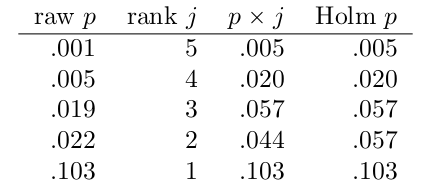

lower Type II error rate than Bonferroni and same Type I error rate

Holm is the default correction in the native R function and lsr function

In [45]:
posthocPairwiseT(my.anova)


	Pairwise comparisons using t tests with pooled SD 

data:  mood.gain and drug 

         placebo anxifree
anxifree 0.1502  -       
joyzepam 9.1e-05 0.0011  

P value adjustment method: holm 

## Assumptions of the one-way ANOVA

- Normality (QQ plots or Shapiro-Wilk test)
- Homogeneity of variance
- independence- knowing one residual tells you nothing about any other residual

## Checking the homogenity of variance

Levene test and Brown-Forsythe test (also Bartlett test)

Levene test:
$$
Z_{ik} = |Y_{ik} - \bar Y_k|
$$

hypothesis: the population means of Z are identical for all groups. Just run ANOVA on the variable $Z_{ik}$

Brown-Forsythe test:
$$
Z_{ik} = |Y_{ik} - \text{median}_k (Y)|
$$

**Running the Levene's test in R**

use the leveneTest() in car package (had trouble installing car so not copying the code here)

In [48]:
install.packages("car")

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



by default, leveneTest() actually runs Brown-Forsythe since it's more robust. can specify center=mean to use original Levene

In [50]:
Y <- clin.trial$mood.gain
G <- clin.trial$drug
gp.mean <- tapply(Y, G, mean)
Ybar <- gp.mean[G]
Z <- abs(Y - Ybar)
summary(aov(Z~G))

            Df Sum Sq Mean Sq F value Pr(>F)
G            2 0.0616 0.03080    1.45  0.266
Residuals   15 0.3187 0.02125               

## Removing the homogenity of variance

run `oneway.test()` (this is a welch one-way test). set var.equal=FALSE (this is the default)

In [51]:
oneway.test(mood.gain~drug, data=clin.trial)


	One-way analysis of means (not assuming equal variances)

data:  mood.gain and drug
F = 26.322, num df = 2.0000, denom df = 9.4932, p-value = 0.000134


In [52]:
oneway.test(mood.gain~drug, data=clin.trial, var.equal=TRUE)


	One-way analysis of means

data:  mood.gain and drug
F = 18.611, num df = 2, denom df = 15, p-value = 8.646e-05


## Checking the normality assumption

use the $\epsilon_{ik}$ values to draw a QQ plot and run a shapiro-wilkes test

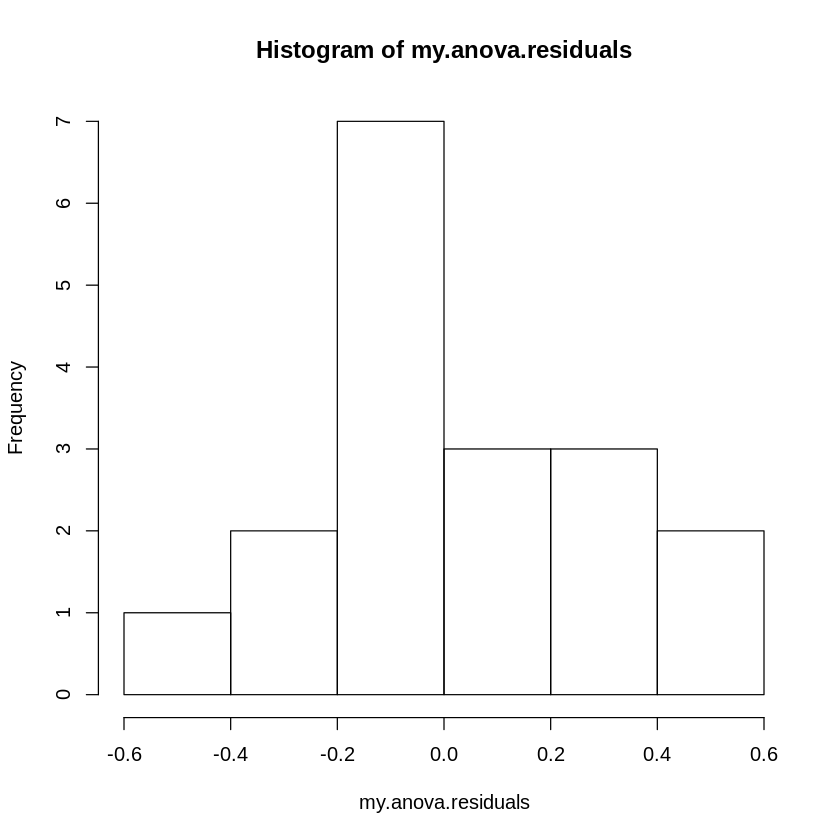


	Shapiro-Wilk normality test

data:  my.anova.residuals
W = 0.96019, p-value = 0.6053


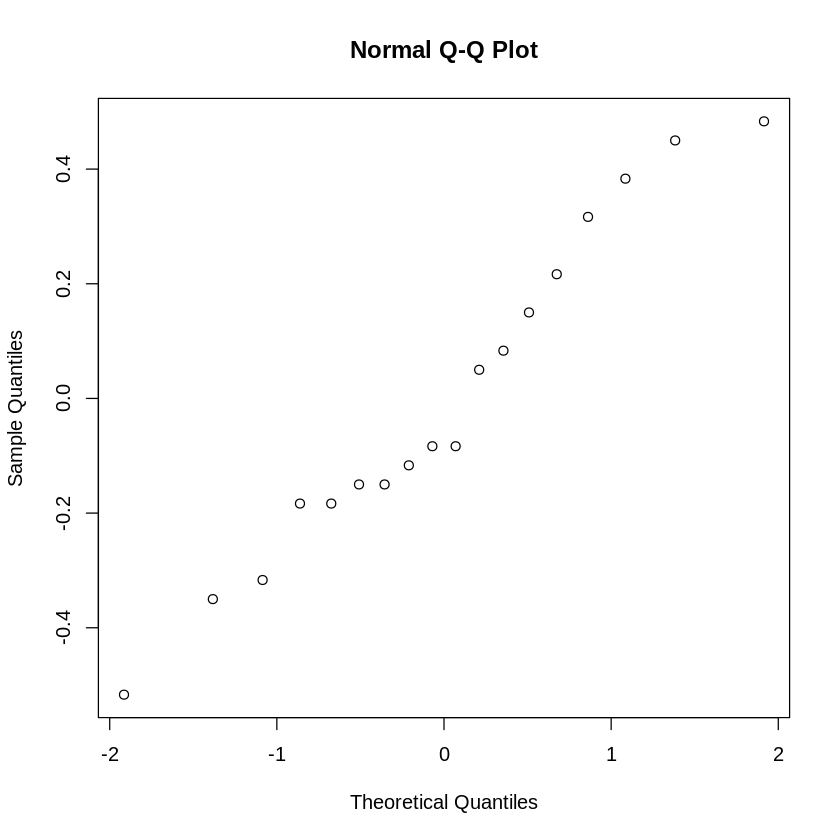

In [53]:
my.anova.residuals <- residuals(object=my.anova)
hist(my.anova.residuals)
qqnorm(my.anova.residuals)
shapiro.test(my.anova.residuals)

## Removing the normality assumption

best to use a non-parameteric test

use the **Kruskal-Wallis rank sum test**

**The logic behind the Kruskal-Wallis test**<br> 

rank the order of $Y_{ik}$ values. let $R_{ik}$ be the ranking given to the ith member of the kth group. calculate the average rank given to observations in the k-th group

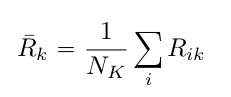

grand mean rank

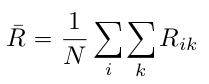

then do the same thing we did with ANOVA, but squared differences with the ranks

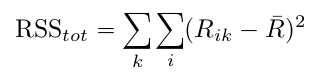
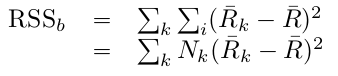
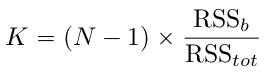

If null is true, the K is approx $\chi^2$ with $G-1$ dof


If there are ties, we need a tie correction factor. Divide K by this quantity

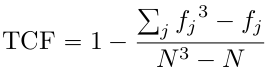

**How to run the Kruskal-Wallis test in R**

In [54]:
kruskal.test(mood.gain ~ drug, data=clin.trial)


	Kruskal-Wallis rank sum test

data:  mood.gain by drug
Kruskal-Wallis chi-squared = 12.076, df = 2, p-value = 0.002386


## On the relationship between ANOVA and the student t-test

ANOVA is equivalent to the student t-test when there are 2 means

In [55]:
summary(aov(mood.gain~therapy, data=clin.trial))

            Df Sum Sq Mean Sq F value Pr(>F)
therapy      1  0.467  0.4672   1.708   0.21
Residuals   16  4.378  0.2736               

In [56]:
t.test(mood.gain~therapy, data=clin.trial, var.equal=TRUE)


	Two Sample t-test

data:  mood.gain by therapy
t = -1.3068, df = 16, p-value = 0.2098
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8449518  0.2005073
sample estimates:
mean in group no.therapy        mean in group CBT 
               0.7222222                1.0444444 
